Dataset structure:
<xarray.Dataset>
Dimensions:              (x0: 100, x1: 100, points: 10000, coordinates: 2)
Coordinates:
  * x0                   (x0) float64 0.0 0.0101 0.0202 ... 0.9798 0.9899 1.0
  * x1                   (x1) float64 0.0 0.0101 0.0202 ... 0.9798 0.9899 1.0
  * points               (points) int64 0 1 2 3 4 5 ... 9995 9996 9997 9998 9999
  * coordinates          (coordinates) <U2 'x0' 'x1'
Data variables:
    noise_values         (x0, x1) float64 0.5 0.4811 0.4636 ... 0.4808 0.5
    normalized_features  (points, coordinates) float64 0.0 0.0 0.0 ... 1.0 1.0
Attributes:
    octaves:     4
    resolution:  [100, 100]
    dimensions:  2


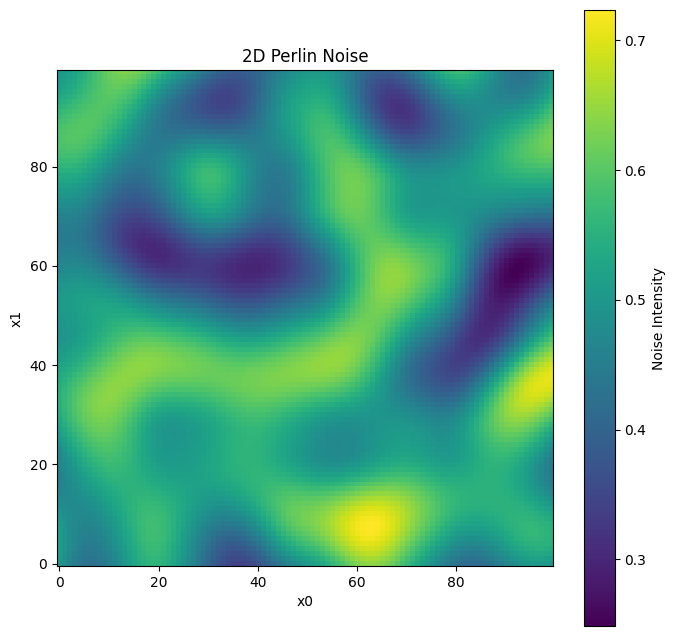

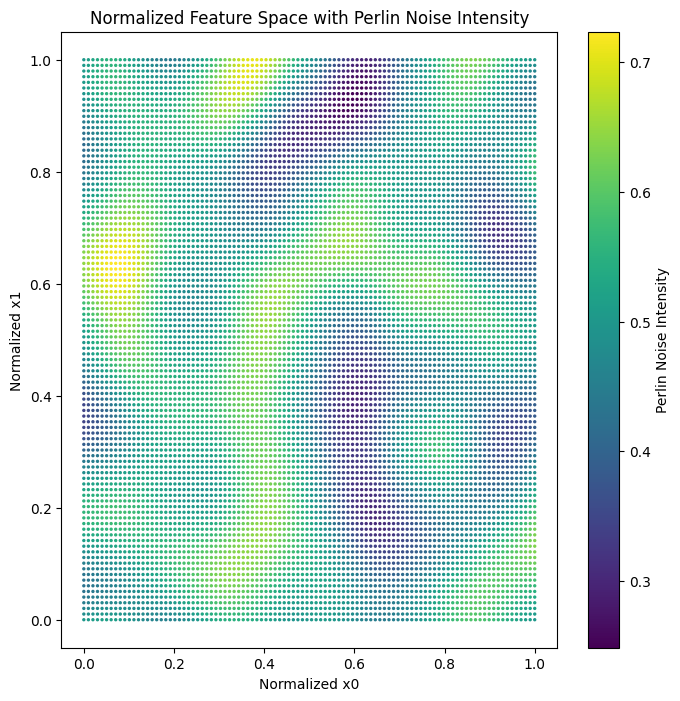

In [2]:
import matplotlib.pyplot as plt

from src.data_generators.perlin_generator import PerlinNoiseGenerator

# Initialize the generator with 2D resolution
generator = PerlinNoiseGenerator(res=[100, 100], octv=4, seed=42, time_test=False)

# Generate Perlin noise data
dataset = generator.perlin_data_xarray()

# Verify the dataset structure
print("Dataset structure:")
print(dataset)

# Plot the 2D Perlin noise values
plt.figure(figsize=(8, 8))
plt.imshow(dataset.noise_values, origin="lower", cmap="viridis")
plt.colorbar(label="Noise Intensity")
plt.title("2D Perlin Noise")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

# Extract normalized coordinates and corresponding noise values
normalized_features = dataset['normalized_features'].values
noise_values = dataset['noise_values'].values.flatten()

# Plot normalized coordinates with color representing Perlin noise values
plt.figure(figsize=(8, 8))
plt.scatter(normalized_features[:, 0], normalized_features[:, 1], c=noise_values, cmap="viridis", s=2)
plt.colorbar(label="Perlin Noise Intensity")
plt.title("Normalized Feature Space with Perlin Noise Intensity")
plt.xlabel("Normalized x0")
plt.ylabel("Normalized x1")
plt.show()


Dataset structure:
<xarray.Dataset>
Dimensions:              (x0: 20, x1: 20, x2: 20, points: 8000, coordinates: 3)
Coordinates:
  * x0                   (x0) float64 0.0 0.05263 0.1053 ... 0.8947 0.9474 1.0
  * x1                   (x1) float64 0.0 0.05263 0.1053 ... 0.8947 0.9474 1.0
  * x2                   (x2) float64 0.0 0.05263 0.1053 ... 0.8947 0.9474 1.0
  * points               (points) int64 0 1 2 3 4 5 ... 7995 7996 7997 7998 7999
  * coordinates          (coordinates) <U2 'x0' 'x1' 'x2'
Data variables:
    noise_values         (x0, x1, x2) float64 0.5 0.4805 0.5356 ... 0.5306 0.5
    normalized_features  (points, coordinates) float64 0.0 0.0 0.0 ... 1.0 1.0
Attributes:
    octaves:     4
    resolution:  [20, 20, 20]
    dimensions:  3


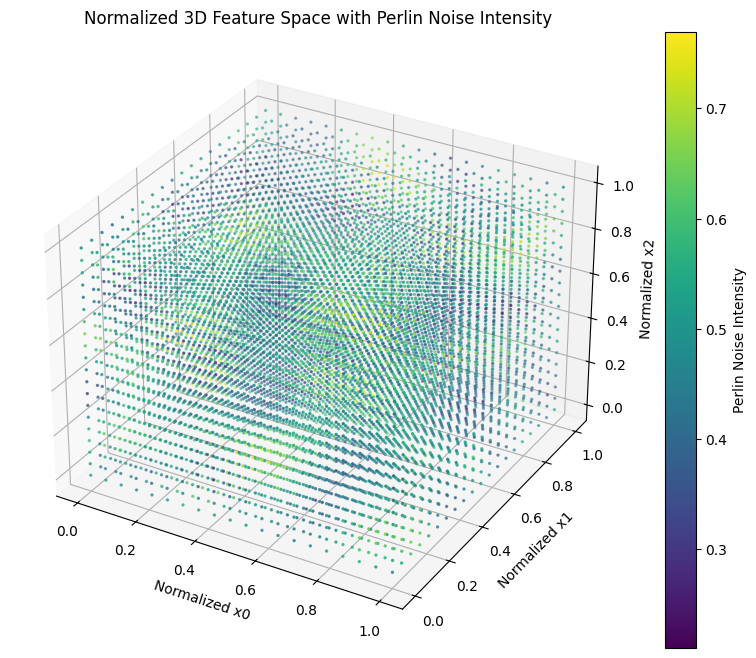

In [4]:
# Initialize the generator with 3D resolution
generator = PerlinNoiseGenerator(res=[20, 20, 20], octv=4, seed=42, time_test=False)

# Generate Perlin noise data
dataset = generator.perlin_data_xarray()

# Verify the dataset structure
print("Dataset structure:")
print(dataset)

# Extract normalized coordinates and corresponding noise values
normalized_features = dataset['normalized_features'].values
noise_values = dataset['noise_values'].values.flatten()

# 3D Scatter plot of normalized coordinates with color representing Perlin noise values
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(normalized_features[:, 0], normalized_features[:, 1], normalized_features[:, 2], 
                c=noise_values, cmap="viridis", s=2)

# Add color bar and labels
plt.colorbar(sc, label="Perlin Noise Intensity")
ax.set_title("Normalized 3D Feature Space with Perlin Noise Intensity")
ax.set_xlabel("Normalized x0")
ax.set_ylabel("Normalized x1")
ax.set_zlabel("Normalized x2")
plt.show()
